# Visualization Codes for Supplementary Pictures

We list the extra experiments we've conducted for supplementary section

- RSD Variations
    - (12) `mose | expertx | ocm`: different student expert
- Data Augmentation
    - (3) `mose | expert3 | scr`: scr
    - (3) `mose | expert3 | ocm`: ocm
    - (3) `mose_no_flip | expert3 | scr`: scr but without flip augmentation
    - (3) `mose_no_flip | expert3 | ocm`: ocm but without flip augmentation
- NCM Classifiers
    - (3) `mose | expert3 | ocm`: ocm
    - (3) `mose_linear | expert3 | ocm`: ocm but with linear output
- Exploring Multi-level Experts
    - (12) `mose | obs_expertx`: ob expert-wise behavior when the last expert is the target student

The baseline experiment we use to represent our best MOSE:
`mose | expert3 | ocm | cifar100`

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
BASE_DIR = './outputs'
MEM_SIZE = ['1000', '2000', '5000']
RUNS = [f"run_{r:02d}" for r in range(5)]

folders = []
for root, _, files in os.walk(BASE_DIR, followlinks=True):
    if 'mose' in root and 'expert' in root:
        folders.append(root)
print(len(folders))

180


## RSD Variations

In [26]:
last_csv_files = {}
moe_csv_files = {}
for e in range(4):
    prefix = f"mose | expert{e} | ocm"
    last_csv_files[e] = {}
    moe_csv_files[e] = {}
    for mem in MEM_SIZE:
        last_csv_files[e][mem] = {}
        moe_csv_files[e][mem] = {}
        for run_id in RUNS:
            for folder in folders:
                if prefix in folder and mem in folder and run_id in folder:
                    csv_path = os.path.join(folder, 'last_task_accs_table.csv')
                    last_csv_files[e][mem][run_id] = pd.read_csv(csv_path)
                    moe_csv_path = os.path.join(folder, 'task_accs_table.csv')
                    moe_csv_files[e][mem][run_id] = pd.read_csv(moe_csv_path)

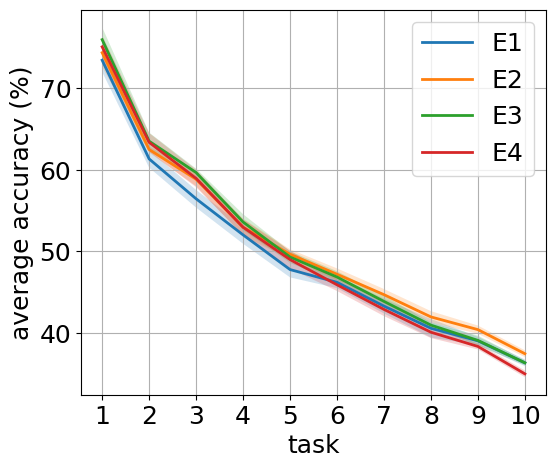

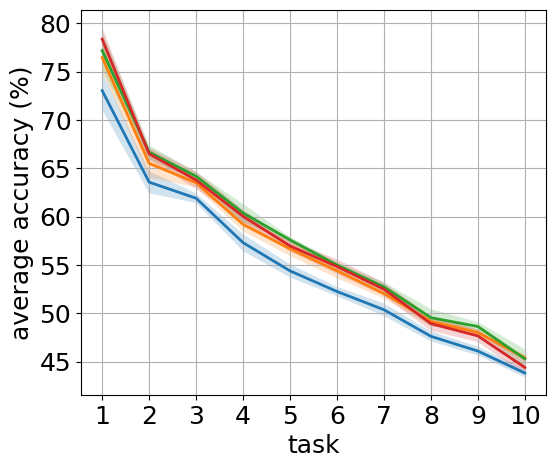

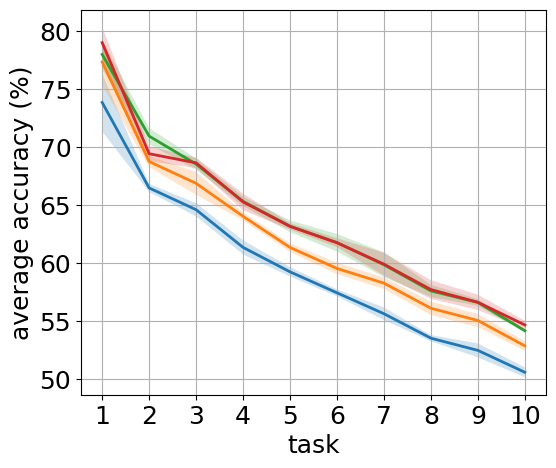

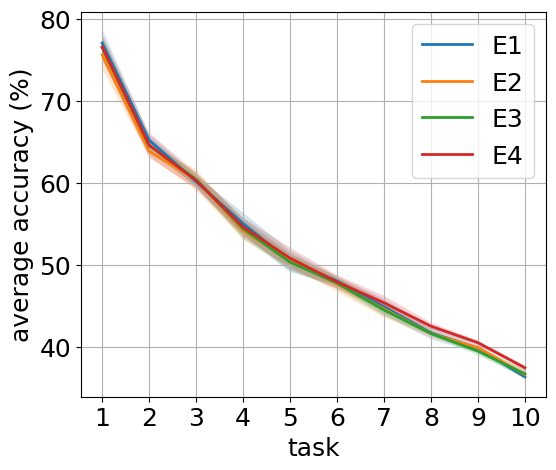

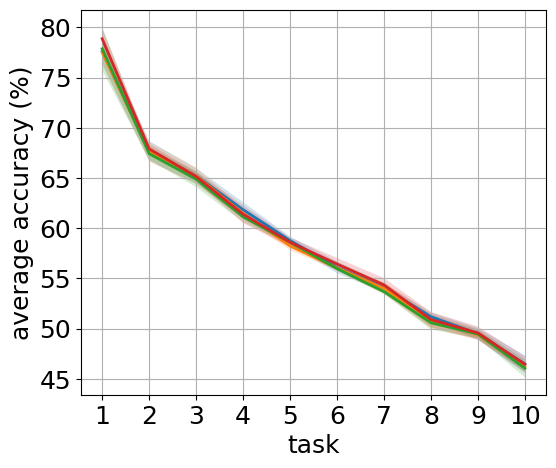

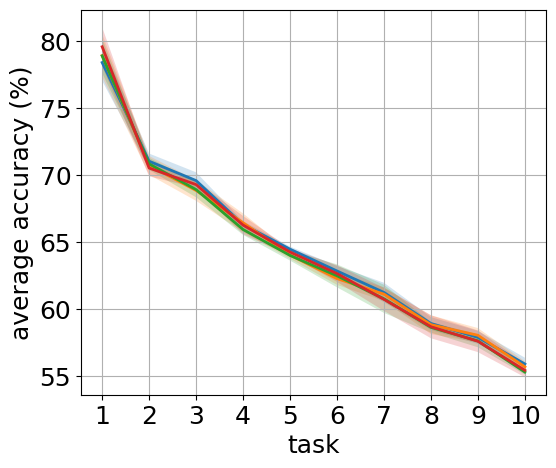

In [44]:
def plot_expert_avg_acc(mem='1000', csv_files=last_csv_files, legend=False):
    expert0,expert1,expert2,expert3 = {}, {}, {}, {}
    for run_id in RUNS:
        expert0[run_id] = [0. for _ in range(10)]
        expert1[run_id] = [0. for _ in range(10)]
        expert2[run_id] = [0. for _ in range(10)]
        expert3[run_id] = [0. for _ in range(10)]

        expert0_df = csv_files[0][mem][run_id]
        expert1_df = csv_files[1][mem][run_id]
        expert2_df = csv_files[2][mem][run_id]
        expert3_df = csv_files[3][mem][run_id]

        for current_task_id in range(10):
            for test_task_id in range(current_task_id+1):
                test_task_name  = f"task{test_task_id}"
                
                expert0[run_id][current_task_id] += expert0_df.iloc[current_task_id][test_task_name] / (current_task_id+1)
                expert1[run_id][current_task_id] += expert1_df.iloc[current_task_id][test_task_name] / (current_task_id+1)
                expert2[run_id][current_task_id] += expert2_df.iloc[current_task_id][test_task_name] / (current_task_id+1)
                expert3[run_id][current_task_id] += expert3_df.iloc[current_task_id][test_task_name] / (current_task_id+1)

    expert0_mean = np.mean([expert0[run] for run in RUNS], axis=0)
    expert0_std = np.std([expert0[run] for run in RUNS], axis=0)
    expert1_mean = np.mean([expert1[run] for run in RUNS], axis=0)
    expert1_std = np.std([expert1[run] for run in RUNS], axis=0)
    expert2_mean = np.mean([expert2[run] for run in RUNS], axis=0)
    expert2_std = np.std([expert2[run] for run in RUNS], axis=0)
    expert3_mean = np.mean([expert3[run] for run in RUNS], axis=0)
    expert3_std = np.std([expert3[run] for run in RUNS], axis=0)

    figure = plt.figure(figsize=(6,5))
    x = np.arange(1, 11)
    plt.plot(x, expert0_mean, linewidth=2.0, label='E1')
    plt.plot(x, expert1_mean, linewidth=2.0, label='E2')
    plt.plot(x, expert2_mean, linewidth=2.0, label='E3')
    plt.plot(x, expert3_mean, linewidth=2.0, label='E4')

    plt.fill_between(x, expert0_mean-expert0_std, expert0_mean+expert0_std, alpha=0.2)
    plt.fill_between(x, expert1_mean-expert1_std, expert1_mean+expert1_std, alpha=0.2)
    plt.fill_between(x, expert2_mean-expert2_std, expert2_mean+expert2_std, alpha=0.2)
    plt.fill_between(x, expert3_mean-expert3_std, expert3_mean+expert3_std, alpha=0.2)

    plt.xlabel('task', fontdict={'size' : 18})
    plt.ylabel('average accuracy (%)', fontdict={'size' : 18})
    plt.xticks(x, size= 18)
    plt.yticks(size= 18)
    plt.grid()
    if legend:
        plt.legend(loc='best', fontsize=18, fancybox=True)
    plt.show()

plot_expert_avg_acc('1000', last_csv_files, True)
plot_expert_avg_acc('2000', last_csv_files, False)
plot_expert_avg_acc('5000', last_csv_files, False)

plot_expert_avg_acc('1000', moe_csv_files, True)
plot_expert_avg_acc('2000', moe_csv_files, False)
plot_expert_avg_acc('5000', moe_csv_files, False)

mem_size: 1000
expert0_mean:	 [27.71999969 25.36000023 35.61999893 25.5        30.54000053 35.9
 39.25999985 40.60000076 45.85999985 57.18000031]
expert0_std:	 [2.3608479  1.33056396 2.22925993 0.67823294 3.74090871 2.8163814
 1.47864833 1.10815185 2.66878225 1.16172259]
expert1_mean:	 [29.00000038 23.80000038 34.94000015 25.18000031 31.65999985 37.25999985
 39.88000031 43.45999908 47.47999954 62.04000092]
expert1_std:	 [2.76477868 2.60461177 1.74654054 1.13560603 3.32301052 3.83384919
 3.10573593 1.24032269 1.36733311 2.16296106]
expert2_mean:	 [25.56000023 18.56000042 31.54000015 22.24000015 28.         35.36000061
 36.2        42.6        51.65999985 71.84000092]
expert2_std:	 [3.21409363 2.14345528 1.336563   0.71442252 1.82975354 2.41545028
 1.41562681 1.84607735 3.29520789 2.56093665]
expert3_mean:	 [24.75999985 17.83999996 29.61999969 21.22000046 26.13999977 32.97999954
 34.99999924 38.88000031 48.57999954 75.        ]
expert3_std:	 [2.08671964 2.42206515 1.25123972 2.23821381 3

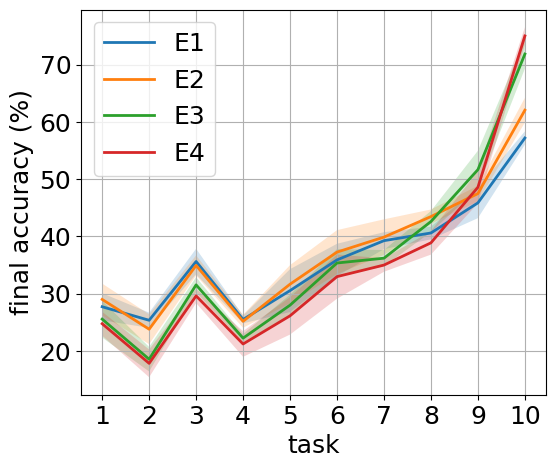

mem_size: 2000
expert0_mean:	 [40.6        37.18000031 44.31999969 37.35999985 40.99999924 45.28000031
 45.57999954 44.74000015 48.89999924 53.27999954]
expert0_std:	 [1.19498957 2.1609247  2.19763405 1.62308325 1.97686572 1.57911481
 2.17660344 1.42070434 0.94021316 1.71510958]
expert1_mean:	 [41.1        37.13999939 45.44000015 36.91999969 42.85999985 47.11999969
 47.55999985 47.18000031 51.75999985 57.05999908]
expert1_std:	 [1.23288305 2.40216519 2.01851432 1.44968994 1.53179616 1.8850995
 1.41788625 1.94874312 1.38361807 1.79955628]
expert2_mean:	 [38.97999954 35.02000008 43.85999985 33.89999886 40.15999985 45.49999924
 46.43999939 48.92000046 55.39999924 64.79999847]
expert2_std:	 [2.96607403 1.93225307 2.96620973 1.38419634 2.69636847 0.45606974
 1.51868316 1.24803752 1.46013753 1.6625277 ]
expert3_mean:	 [38.47999954 32.66000061 42.30000076 30.66000023 38.56000061 44.08000031
 45.60000076 47.08000031 54.84000015 69.73999939]
expert3_std:	 [2.5301385  3.0309079  1.62726818 1.309

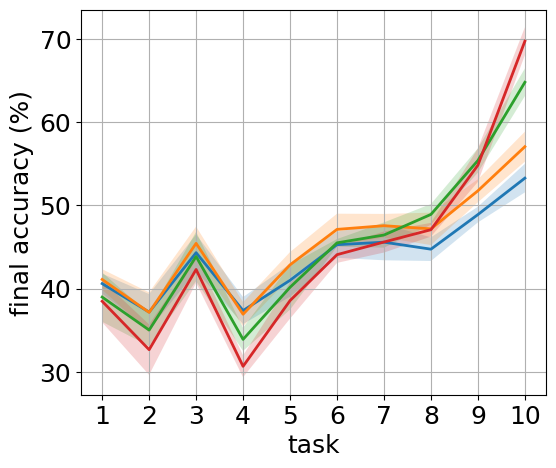

mem_size: 5000
expert0_mean:	 [49.94000015 47.16000061 55.94000015 45.91999893 49.96000061 53.50000076
 51.53999939 48.49999924 52.27999954 50.8       ]
expert0_std:	 [1.26586017 1.2753042  1.04038417 1.39914249 1.65843354 0.41952405
 1.00119924 0.91214056 0.87498466 1.57607093]
expert1_mean:	 [52.9        49.58000031 56.66000061 48.20000076 52.13999939 55.08000031
 53.2        51.62000046 55.7        53.23999939]
expert1_std:	 [1.19331415 1.51049626 0.89353197 0.9777536  2.19508506 1.26712322
 1.70176419 1.64608546 1.09909001 1.02097909]
expert2_mean:	 [52.69999924 47.8        57.57999954 48.38000031 51.75999985 56.02000046
 54.84000015 54.32000046 58.89999924 59.03999939]
expert2_std:	 [1.37985579 1.49666214 1.57149616 1.35558134 1.31392494 1.03807516
 1.98453985 0.49152889 0.97159656 1.10743061]
expert3_mean:	 [53.35999985 47.70000076 56.82000046 47.18000031 52.3        55.65999908
 54.62000046 55.62000046 60.95999985 62.11999893]
expert3_std:	 [1.62308386 1.99699826 1.59423912 0.54

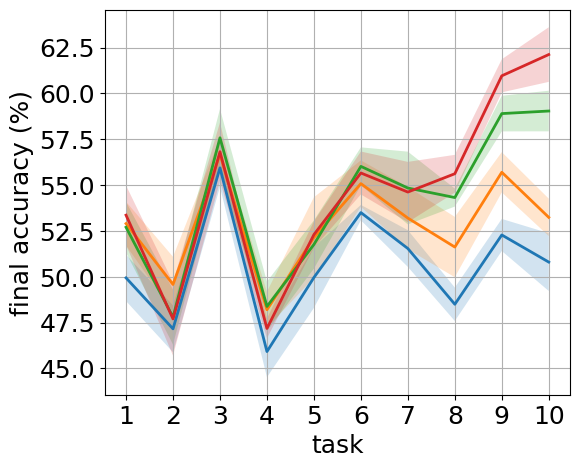

mem_size: 1000
expert0_mean:	 [24.92000046 20.10000038 32.48000031 20.85999985 28.08000031 34.15999985
 35.94000092 41.32000046 50.13999939 75.28000031]
expert0_std:	 [2.30599208 1.22637682 2.3709921  0.82364987 2.96877119 2.92410699
 1.71650776 0.85182189 3.20474622 3.14731714]
expert1_mean:	 [26.47999992 19.3        32.6        21.79999962 28.32000008 34.78000031
 36.95999985 42.         49.29999924 74.39999847]
expert1_std:	 [2.55060794 2.00897945 2.04058823 1.06018832 2.93489397 3.92601568
 2.58503273 1.56460733 2.9522881  2.46333103]
expert2_mean:	 [25.84000015 19.79999981 32.29999962 21.68000031 28.56000023 34.89999924
 35.95999985 41.57999954 51.18000031 75.08000031]
expert2_std:	 [3.23765361 3.00199962 2.43145984 0.89308469 2.16203589 2.80784548
 1.65360212 1.68807552 3.62347825 1.51049732]
expert3_mean:	 [26.88000031 20.55999966 32.99999924 23.55999985 29.87999992 35.54000053
 38.08000031 42.7        51.51999969 72.61999969]
expert3_std:	 [2.14886031 2.91382891 1.2198357  1.82

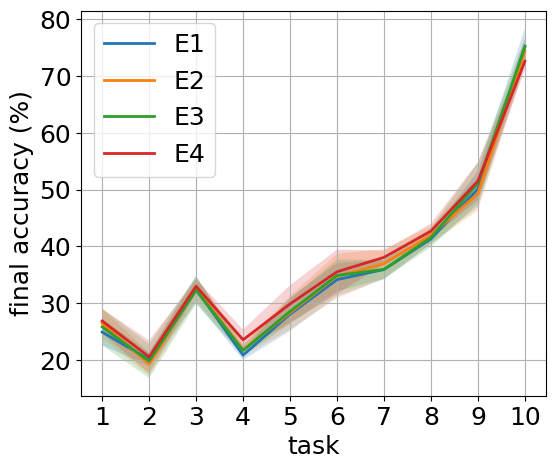

mem_size: 2000
expert0_mean:	 [39.87999954 34.77999992 45.98000107 34.08000031 40.26000061 45.82000046
 46.47999954 49.54000015 57.49999924 70.47999878]
expert0_std:	 [1.41477838 2.616409   2.61028733 1.7151092  1.66204633 1.61418642
 1.30598591 0.79649228 1.44083245 1.1582744 ]
expert1_mean:	 [39.62000046 34.86000061 43.94000015 33.12000046 41.46000061 46.18000031
 46.44000015 49.3        57.15999985 69.81999969]
expert1_std:	 [1.92603221 1.69422545 2.22764377 0.47074475 1.628005   1.92291478
 0.88679172 2.01295755 1.925202   1.01074083]
expert2_mean:	 [40.11999969 34.60000038 43.94000092 33.44000015 40.22000046 45.7
 45.94000015 50.18000031 57.14000015 69.22000122]
expert2_std:	 [2.9566189  2.07171466 2.8210638  1.37782358 2.22476921 1.00994981
 1.3260476  1.74057483 1.37200585 1.51049542]
expert3_mean:	 [40.2        35.59999924 45.23999939 34.44000015 40.74000015 46.41999969
 47.87999954 49.50000076 56.91999969 67.58000031]
expert3_std:	 [2.41080866 2.69518058 2.64847116 1.21753881 

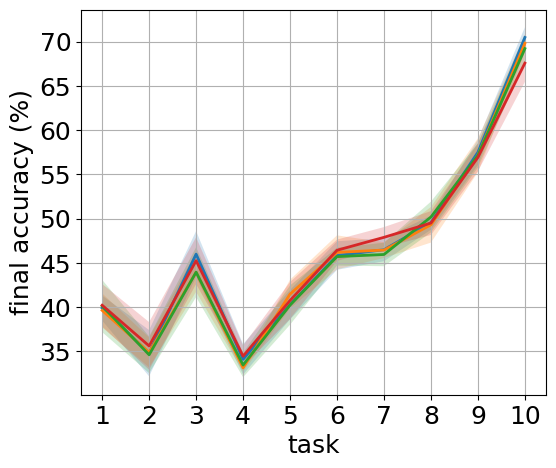

mem_size: 5000
expert0_mean:	 [53.84000015 49.08000031 59.58000031 48.55999985 53.3        57.3
 55.77999954 56.05999908 62.2        63.1       ]
expert0_std:	 [2.16573391 1.53805058 1.36293788 1.557691   0.42426407 1.76408623
 1.86268705 0.81633287 0.92736284 1.5205257 ]
expert1_mean:	 [54.41999969 48.98000031 58.76000061 48.49999924 54.03999863 56.83999939
 55.15999985 56.05999985 61.70000076 62.18000031]
expert1_std:	 [1.51182011 2.30251959 0.95205043 1.18995694 1.1723483  1.87040127
 2.35167938 0.7761446  1.16447438 1.44416064]
expert2_mean:	 [53.28000031 49.1        58.54000015 48.76000061 52.74000015 56.94000015
 54.94000015 55.60000076 61.50000076 61.33999939]
expert2_std:	 [1.41194882 1.37404481 1.33506538 0.84522155 1.55897421 1.55640641
 2.10959731 0.850882   1.34014946 0.75789189]
expert3_mean:	 [55.03999939 49.23999939 57.86000061 48.13999939 53.6        56.85999985
 54.95999985 56.00000076 61.15999985 61.20000076]
expert3_std:	 [1.37054674 2.25441788 0.97897871 1.0012001  

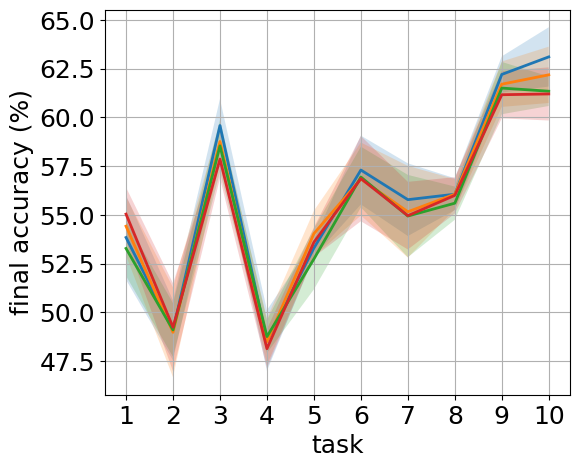

In [45]:
def plot_expert_final_acc(mem='1000', csv_files=last_csv_files, legend=False):
    expert0,expert1,expert2,expert3 = {}, {}, {}, {}
    for run_id in RUNS:
        expert0[run_id] = [0. for _ in range(10)]
        expert1[run_id] = [0. for _ in range(10)]
        expert2[run_id] = [0. for _ in range(10)]
        expert3[run_id] = [0. for _ in range(10)]

        expert0_df = csv_files[0][mem][run_id]
        expert1_df = csv_files[1][mem][run_id]
        expert2_df = csv_files[2][mem][run_id]
        expert3_df = csv_files[3][mem][run_id]

        current_task_id = 9
        for test_task_id in range(current_task_id+1):
            test_task_name  = f"task{test_task_id}"

            expert0[run_id][test_task_id] += expert0_df.iloc[current_task_id][test_task_name]
            expert1[run_id][test_task_id] += expert1_df.iloc[current_task_id][test_task_name]
            expert2[run_id][test_task_id] += expert2_df.iloc[current_task_id][test_task_name]
            expert3[run_id][test_task_id] += expert3_df.iloc[current_task_id][test_task_name]

    expert0_mean = np.mean([expert0[run] for run in RUNS], axis=0)
    expert0_std = np.std([expert0[run] for run in RUNS], axis=0)
    expert1_mean = np.mean([expert1[run] for run in RUNS], axis=0)
    expert1_std = np.std([expert1[run] for run in RUNS], axis=0)
    expert2_mean = np.mean([expert2[run] for run in RUNS], axis=0)
    expert2_std = np.std([expert2[run] for run in RUNS], axis=0)
    expert3_mean = np.mean([expert3[run] for run in RUNS], axis=0)
    expert3_std = np.std([expert3[run] for run in RUNS], axis=0)

    print(f"mem_size: {mem}")
    print(f"expert0_mean:\t {expert0_mean}")
    print(f"expert0_std:\t {expert0_std}")
    print(f"expert1_mean:\t {expert1_mean}")
    print(f"expert1_std:\t {expert1_std}")
    print(f"expert2_mean:\t {expert2_mean}")
    print(f"expert2_std:\t {expert2_std}")
    print(f"expert3_mean:\t {expert3_mean}")
    print(f"expert3_std:\t {expert3_std}")


    figure = plt.figure(figsize=(6,5))
    x = np.arange(1, 11)
    plt.plot(x, expert0_mean, linewidth=2.0, label='E1')
    plt.plot(x, expert1_mean, linewidth=2.0, label='E2')
    plt.plot(x, expert2_mean, linewidth=2.0, label='E3')
    plt.plot(x, expert3_mean, linewidth=2.0, label='E4')

    plt.fill_between(x, expert0_mean-expert0_std, expert0_mean+expert0_std, alpha=0.2)
    plt.fill_between(x, expert1_mean-expert1_std, expert1_mean+expert1_std, alpha=0.2)
    plt.fill_between(x, expert2_mean-expert2_std, expert2_mean+expert2_std, alpha=0.2)
    plt.fill_between(x, expert3_mean-expert3_std, expert3_mean+expert3_std, alpha=0.2)

    plt.xlabel('task', fontdict={'size' : 18})
    plt.ylabel('final accuracy (%)', fontdict={'size' : 18})
    plt.xticks(x, size= 18)
    plt.yticks(size= 18)
    plt.grid()
    if legend:
        plt.legend(loc='best', fontsize=18, fancybox=True)
    plt.show()

plot_expert_final_acc('1000', last_csv_files, True)
plot_expert_final_acc('2000', last_csv_files, False)
plot_expert_final_acc('5000', last_csv_files, False)

plot_expert_final_acc('1000', moe_csv_files, True)
plot_expert_final_acc('2000', moe_csv_files, False)
plot_expert_final_acc('5000', moe_csv_files, False)

## Data Augmentation

In [49]:
DATA_AUGMENTATION_PREFIXES = [
    'mose_no_flip | expert3 | scr',
    'mose_no_flip | expert3 | ocm',
    'mose | expert3 | scr',
    'mose | expert3 | ocm',
]

last_da_csv_files = {}
moe_da_csv_files = {}

for da in DATA_AUGMENTATION_PREFIXES:
    last_da_csv_files[da] = {}
    moe_da_csv_files[da] = {}
    for mem in MEM_SIZE:
        last_da_csv_files[da][mem] = {}
        moe_da_csv_files[da][mem] = {}
        for run_id in RUNS:
            for folder in folders:
                if da in folder and mem in folder and run_id in folder:
                    csv_path = os.path.join(folder, 'last_task_accs_table.csv')
                    last_da_csv_files[da][mem][run_id] = pd.read_csv(csv_path)
                    moe_csv_path = os.path.join(folder, 'task_accs_table.csv')
                    moe_da_csv_files[da][mem][run_id] = pd.read_csv(moe_csv_path)


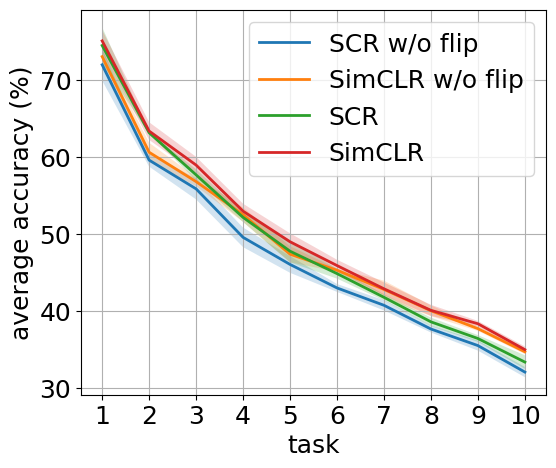

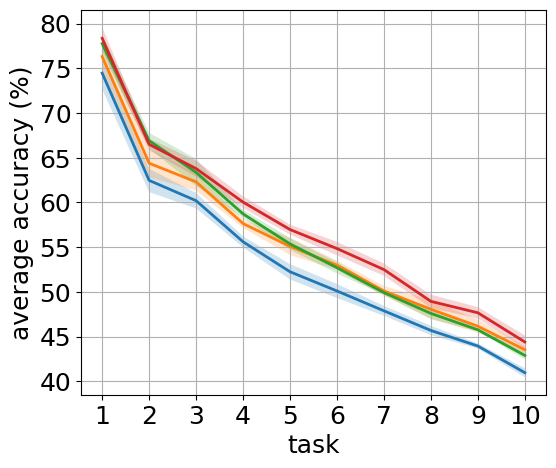

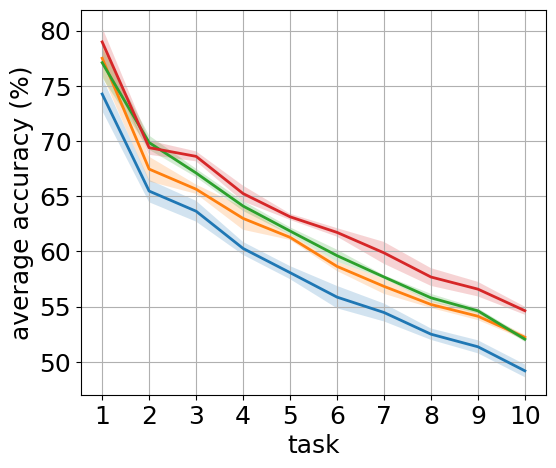

In [53]:
def plot_da_avg_acc(mem='1000', csv_files=last_da_csv_files, legend=False):
    expert0,expert1,expert2,expert3 = {}, {}, {}, {}
    for run_id in RUNS:
        expert0[run_id] = [0. for _ in range(10)]
        expert1[run_id] = [0. for _ in range(10)]
        expert2[run_id] = [0. for _ in range(10)]
        expert3[run_id] = [0. for _ in range(10)]

        expert0_df = csv_files[DATA_AUGMENTATION_PREFIXES[0]][mem][run_id]
        expert1_df = csv_files[DATA_AUGMENTATION_PREFIXES[1]][mem][run_id]
        expert2_df = csv_files[DATA_AUGMENTATION_PREFIXES[2]][mem][run_id]
        expert3_df = csv_files[DATA_AUGMENTATION_PREFIXES[3]][mem][run_id]

        for current_task_id in range(10):
            for test_task_id in range(current_task_id+1):
                test_task_name  = f"task{test_task_id}"
                
                expert0[run_id][current_task_id] += expert0_df.iloc[current_task_id][test_task_name] / (current_task_id+1)
                expert1[run_id][current_task_id] += expert1_df.iloc[current_task_id][test_task_name] / (current_task_id+1)
                expert2[run_id][current_task_id] += expert2_df.iloc[current_task_id][test_task_name] / (current_task_id+1)
                expert3[run_id][current_task_id] += expert3_df.iloc[current_task_id][test_task_name] / (current_task_id+1)

    expert0_mean = np.mean([expert0[run] for run in RUNS], axis=0)
    expert0_std = np.std([expert0[run] for run in RUNS], axis=0)
    expert1_mean = np.mean([expert1[run] for run in RUNS], axis=0)
    expert1_std = np.std([expert1[run] for run in RUNS], axis=0)
    expert2_mean = np.mean([expert2[run] for run in RUNS], axis=0)
    expert2_std = np.std([expert2[run] for run in RUNS], axis=0)
    expert3_mean = np.mean([expert3[run] for run in RUNS], axis=0)
    expert3_std = np.std([expert3[run] for run in RUNS], axis=0)

    figure = plt.figure(figsize=(6,5))
    x = np.arange(1, 11)
    plt.plot(x, expert0_mean, linewidth=2.0, label='SCR w/o flip')
    plt.plot(x, expert1_mean, linewidth=2.0, label='SimCLR w/o flip')
    plt.plot(x, expert2_mean, linewidth=2.0, label='SCR')
    plt.plot(x, expert3_mean, linewidth=2.0, label='SimCLR')

    plt.fill_between(x, expert0_mean-expert0_std, expert0_mean+expert0_std, alpha=0.2)
    plt.fill_between(x, expert1_mean-expert1_std, expert1_mean+expert1_std, alpha=0.2)
    plt.fill_between(x, expert2_mean-expert2_std, expert2_mean+expert2_std, alpha=0.2)
    plt.fill_between(x, expert3_mean-expert3_std, expert3_mean+expert3_std, alpha=0.2)

    plt.xlabel('task', fontdict={'size' : 18})
    plt.ylabel('average accuracy (%)', fontdict={'size' : 18})
    plt.xticks(x, size= 18)
    plt.yticks(size= 18)
    plt.grid()
    if legend:
        plt.legend(loc='best', fontsize=18, fancybox=True)
    plt.show()

plot_da_avg_acc('1000', last_da_csv_files, True)
plot_da_avg_acc('2000', last_da_csv_files, False)
plot_da_avg_acc('5000', last_da_csv_files, False)

mem_size: 1000
SCR w/o flip_mean:	 [23.87999954 17.66000004 29.56000023 18.63999977 24.34000015 32.17999992
 32.00000076 32.97999992 43.3        66.35999908]
SCR w/o flip_std:	 [1.86161168 2.40050026 1.9334944  2.3122282  2.02049503 3.17326328
 1.9585709  3.40669901 2.55342925 2.04606885]
SimCLR w/o flip_mean:	 [25.73999977 19.74000015 29.77999992 21.17999954 26.63999977 32.26000061
 34.35999985 38.98000031 46.68000031 71.84000092]
SimCLR w/o flip_std:	 [2.53739979 2.97899333 1.78818406 1.07962925 2.34571956 3.24505839
 1.47729458 1.91874934 1.43443354 1.98655586]
SCR_mean:	 [25.17999992 18.62000046 28.31999969 19.31999969 25.16000023 32.91999969
 33.44000015 35.71999969 44.11999969 71.08000031]
SCR_std:	 [1.8421728  1.83673664 1.18220097 2.32499478 1.27999986 3.39081154
 1.87147074 3.46028853 3.08506038 0.32496184]
SimCLR_mean:	 [24.75999985 17.83999996 29.61999969 21.22000046 26.13999977 32.97999954
 34.99999924 38.88000031 48.57999954 75.        ]
SimCLR_std:	 [2.08671964 2.42206515

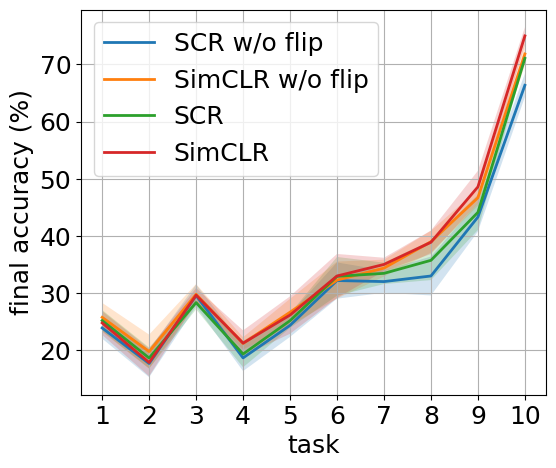

mem_size: 2000
SCR w/o flip_mean:	 [34.25999985 30.98000069 40.02000046 30.69999962 35.63999939 41.2
 43.48000031 42.88000031 50.93999939 59.58000031]
SCR w/o flip_std:	 [0.90906434 1.11606485 1.62406893 1.77988705 2.52000034 1.31605486
 1.34372553 1.9260325  1.78056114 2.3844489 ]
SimCLR w/o flip_mean:	 [37.91999969 32.20000038 42.54000015 31.30000038 37.66000061 42.62000046
 44.15999985 46.64000015 53.34000092 66.94000092]
SimCLR w/o flip_std:	 [1.735973   1.96672329 1.88424952 2.0610675  2.63787721 0.65543884
 1.84564364 2.01950463 1.9734233  1.34848155]
SCR_mean:	 [35.88000107 31.22000008 41.98000031 30.89999962 37.85999985 42.21999969
 43.17999954 43.85999985 55.37999954 66.46000061]
SCR_std:	 [0.62737537 0.78332594 1.59924989 2.07846084 1.56025639 1.85838642
 1.93948377 1.31544644 3.5745766  1.88318898]
SimCLR_mean:	 [38.47999954 32.66000061 42.30000076 30.66000023 38.56000061 44.08000031
 45.60000076 47.08000031 54.84000015 69.73999939]
SimCLR_std:	 [2.5301385  3.0309079  1.6272

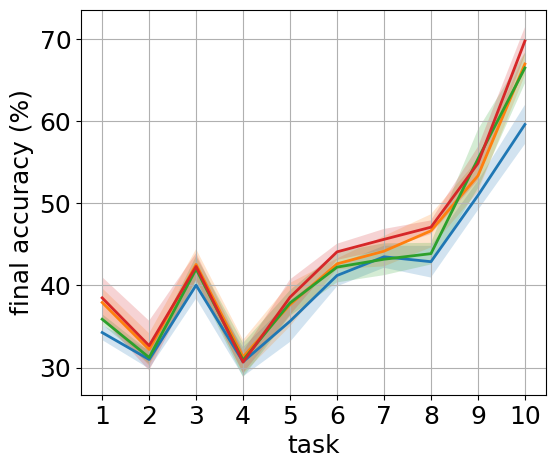

mem_size: 5000
SCR w/o flip_mean:	 [46.30000076 44.38000031 52.93999939 42.25999985 47.55999985 50.74000015
 49.44000092 48.11999969 53.23999939 56.92000046]
SCR w/o flip_std:	 [2.06203815 1.59924983 0.81633275 2.08672025 1.41506118 2.64166632
 1.31392511 0.99879898 0.64062402 1.49586119]
SimCLR w/o flip_mean:	 [50.60000153 46.         55.47999954 44.02000046 50.57999954 54.11999969
 53.31999893 51.7        58.18000031 58.28000031]
SimCLR w/o flip_std:	 [1.80554701 2.3857912  1.25124052 1.53805105 0.94952522 1.04192112
 1.68689053 1.44637523 1.30751742 1.88191347]
SCR_mean:	 [49.48000031 46.84000015 55.         44.3        50.49999924 53.27999954
 53.92000046 50.99999924 57.38000031 58.84000015]
SCR_std:	 [1.02449966 1.50811197 1.65166566 2.68402612 1.04689915 1.23353137
 1.16516091 1.12960175 1.48512705 0.74993432]
SimCLR_mean:	 [53.35999985 47.70000076 56.82000046 47.18000031 52.3        55.65999908
 54.62000046 55.62000046 60.95999985 62.11999893]
SimCLR_std:	 [1.62308386 1.99699826

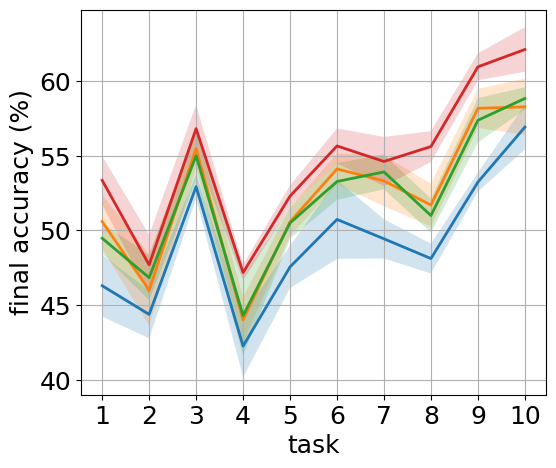

In [58]:
def plot_final_avg_acc(mem='1000', csv_files=last_da_csv_files, legend=False):
    expert0,expert1,expert2,expert3 = {}, {}, {}, {}
    for run_id in RUNS:
        expert0[run_id] = [0. for _ in range(10)]
        expert1[run_id] = [0. for _ in range(10)]
        expert2[run_id] = [0. for _ in range(10)]
        expert3[run_id] = [0. for _ in range(10)]

        expert0_df = csv_files[DATA_AUGMENTATION_PREFIXES[0]][mem][run_id]
        expert1_df = csv_files[DATA_AUGMENTATION_PREFIXES[1]][mem][run_id]
        expert2_df = csv_files[DATA_AUGMENTATION_PREFIXES[2]][mem][run_id]
        expert3_df = csv_files[DATA_AUGMENTATION_PREFIXES[3]][mem][run_id]

        current_task_id = 9
        for test_task_id in range(current_task_id+1):
            test_task_name  = f"task{test_task_id}"

            expert0[run_id][test_task_id] += expert0_df.iloc[current_task_id][test_task_name]
            expert1[run_id][test_task_id] += expert1_df.iloc[current_task_id][test_task_name]
            expert2[run_id][test_task_id] += expert2_df.iloc[current_task_id][test_task_name]
            expert3[run_id][test_task_id] += expert3_df.iloc[current_task_id][test_task_name]

    expert0_mean = np.mean([expert0[run] for run in RUNS], axis=0)
    expert0_std = np.std([expert0[run] for run in RUNS], axis=0)
    expert1_mean = np.mean([expert1[run] for run in RUNS], axis=0)
    expert1_std = np.std([expert1[run] for run in RUNS], axis=0)
    expert2_mean = np.mean([expert2[run] for run in RUNS], axis=0)
    expert2_std = np.std([expert2[run] for run in RUNS], axis=0)
    expert3_mean = np.mean([expert3[run] for run in RUNS], axis=0)
    expert3_std = np.std([expert3[run] for run in RUNS], axis=0)

    print(f"mem_size: {mem}")
    print(f"SCR w/o flip_mean:\t {expert0_mean}")
    print(f"SCR w/o flip_std:\t {expert0_std}")
    print(f"SimCLR w/o flip_mean:\t {expert1_mean}")
    print(f"SimCLR w/o flip_std:\t {expert1_std}")
    print(f"SCR_mean:\t {expert2_mean}")
    print(f"SCR_std:\t {expert2_std}")
    print(f"SimCLR_mean:\t {expert3_mean}")
    print(f"SimCLR_std:\t {expert3_std}")

    figure = plt.figure(figsize=(6,5))
    x = np.arange(1, 11)
    plt.plot(x, expert0_mean, linewidth=2.0, label='SCR w/o flip')
    plt.plot(x, expert1_mean, linewidth=2.0, label='SimCLR w/o flip')
    plt.plot(x, expert2_mean, linewidth=2.0, label='SCR')
    plt.plot(x, expert3_mean, linewidth=2.0, label='SimCLR')

    plt.fill_between(x, expert0_mean-expert0_std, expert0_mean+expert0_std, alpha=0.2)
    plt.fill_between(x, expert1_mean-expert1_std, expert1_mean+expert1_std, alpha=0.2)
    plt.fill_between(x, expert2_mean-expert2_std, expert2_mean+expert2_std, alpha=0.2)
    plt.fill_between(x, expert3_mean-expert3_std, expert3_mean+expert3_std, alpha=0.2)

    plt.xlabel('task', fontdict={'size' : 18})
    plt.ylabel('final accuracy (%)', fontdict={'size' : 18})
    plt.xticks(x, size= 18)
    plt.yticks(size= 18)
    plt.grid()
    if legend:
        plt.legend(loc='best', fontsize=18, fancybox=True)
    plt.show()

plot_final_avg_acc('1000', last_da_csv_files, True)
plot_final_avg_acc('2000', last_da_csv_files, False)
plot_final_avg_acc('5000', last_da_csv_files, False)

## NCM Classifiers

In [55]:
CLASSIFER_PREFIXES = [
    'mose_linear | expert3 | ocm',
    'mose | expert3 | ocm',
]

last_cls_csv_files = {}
moe_cls_csv_files = {}

for cls in CLASSIFER_PREFIXES:
    last_cls_csv_files[cls] = {}
    moe_cls_csv_files[cls] = {}
    for mem in MEM_SIZE:
        last_cls_csv_files[cls][mem] = {}
        moe_cls_csv_files[cls][mem] = {}
        for run_id in RUNS:
            for folder in folders:
                if cls in folder and mem in folder and run_id in folder:
                    csv_path = os.path.join(folder, 'last_task_accs_table.csv')
                    last_cls_csv_files[cls][mem][run_id] = pd.read_csv(csv_path)
                    moe_csv_path = os.path.join(folder, 'task_accs_table.csv')
                    moe_cls_csv_files[cls][mem][run_id] = pd.read_csv(moe_csv_path)


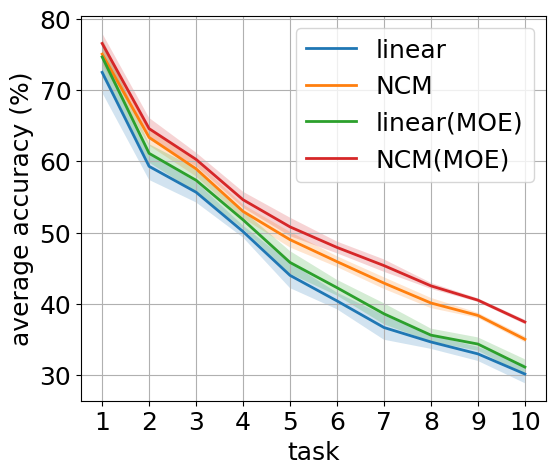

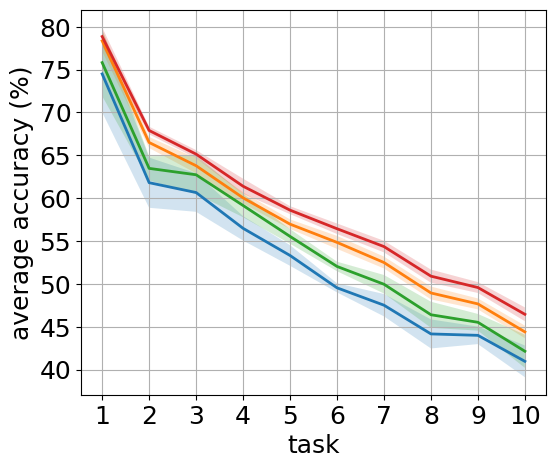

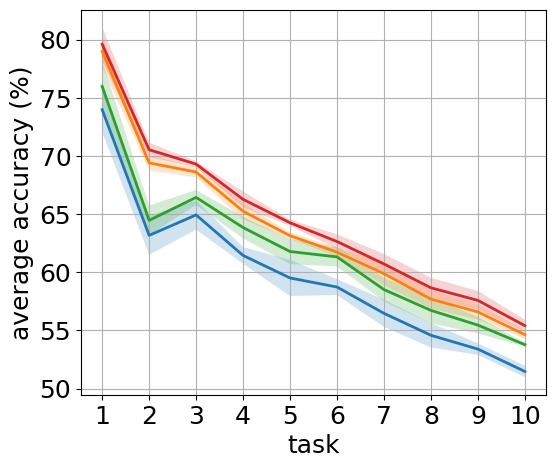

In [57]:
def plot_cls_avg_acc(mem='1000', legend=False):
    expert0,expert1,expert2,expert3 = {}, {}, {}, {}
    for run_id in RUNS:
        expert0[run_id] = [0. for _ in range(10)]
        expert1[run_id] = [0. for _ in range(10)]
        expert2[run_id] = [0. for _ in range(10)]
        expert3[run_id] = [0. for _ in range(10)]

        expert0_df = last_cls_csv_files[CLASSIFER_PREFIXES[0]][mem][run_id]
        expert1_df = last_cls_csv_files[CLASSIFER_PREFIXES[1]][mem][run_id]
        expert2_df = moe_cls_csv_files[CLASSIFER_PREFIXES[0]][mem][run_id]
        expert3_df = moe_cls_csv_files[CLASSIFER_PREFIXES[1]][mem][run_id]

        for current_task_id in range(10):
            for test_task_id in range(current_task_id+1):
                test_task_name  = f"task{test_task_id}"
                
                expert0[run_id][current_task_id] += expert0_df.iloc[current_task_id][test_task_name] / (current_task_id+1)
                expert1[run_id][current_task_id] += expert1_df.iloc[current_task_id][test_task_name] / (current_task_id+1)
                expert2[run_id][current_task_id] += expert2_df.iloc[current_task_id][test_task_name] / (current_task_id+1)
                expert3[run_id][current_task_id] += expert3_df.iloc[current_task_id][test_task_name] / (current_task_id+1)

    expert0_mean = np.mean([expert0[run] for run in RUNS], axis=0)
    expert0_std = np.std([expert0[run] for run in RUNS], axis=0)
    expert1_mean = np.mean([expert1[run] for run in RUNS], axis=0)
    expert1_std = np.std([expert1[run] for run in RUNS], axis=0)
    expert2_mean = np.mean([expert2[run] for run in RUNS], axis=0)
    expert2_std = np.std([expert2[run] for run in RUNS], axis=0)
    expert3_mean = np.mean([expert3[run] for run in RUNS], axis=0)
    expert3_std = np.std([expert3[run] for run in RUNS], axis=0)

    figure = plt.figure(figsize=(6,5))
    x = np.arange(1, 11)
    plt.plot(x, expert0_mean, linewidth=2.0, label='linear')
    plt.plot(x, expert1_mean, linewidth=2.0, label='NCM')
    plt.plot(x, expert2_mean, linewidth=2.0, label='linear(MOE)')
    plt.plot(x, expert3_mean, linewidth=2.0, label='NCM(MOE)')

    plt.fill_between(x, expert0_mean-expert0_std, expert0_mean+expert0_std, alpha=0.2)
    plt.fill_between(x, expert1_mean-expert1_std, expert1_mean+expert1_std, alpha=0.2)
    plt.fill_between(x, expert2_mean-expert2_std, expert2_mean+expert2_std, alpha=0.2)
    plt.fill_between(x, expert3_mean-expert3_std, expert3_mean+expert3_std, alpha=0.2)

    plt.xlabel('task', fontdict={'size' : 18})
    plt.ylabel('average accuracy (%)', fontdict={'size' : 18})
    plt.xticks(x, size= 18)
    plt.yticks(size= 18)
    plt.grid()
    if legend:
        plt.legend(loc='best', fontsize=18, fancybox=True)
    plt.show()

plot_cls_avg_acc('1000', True)
plot_cls_avg_acc('2000', False)
plot_cls_avg_acc('5000', False)

mem_size: 1000
linear_mean:	 [19.67999992 13.21999989 24.         15.36000023 19.82000008 28.00000038
 28.40000038 32.48000069 40.8        79.5       ]
linear_std:	 [2.02820114 2.53566547 2.24410351 2.87374321 3.20836409 4.31740709
 3.44093012 2.6738741  4.00499791 1.52708951]
NCM_mean:	 [24.75999985 17.83999996 29.61999969 21.22000046 26.13999977 32.97999954
 34.99999924 38.88000031 48.57999954 75.        ]
NCM_std:	 [2.08671964 2.42206515 1.25123972 2.23821381 3.27511849 3.85559347
 1.1713246  2.05270534 2.81026672 1.52052751]
linear(MOE)_mean:	 [19.80000038 13.53999996 24.07999992 15.08000031 20.75999985 28.46000023
 29.61999969 34.98000031 43.03999939 81.63999939]
linear(MOE)_std:	 [3.10290191 2.15647865 1.3746273  2.81950352 3.21471586 4.10443687
 2.78093476 2.99292528 4.26736478 1.10199821]
NCM(MOE)_mean:	 [26.88000031 20.55999966 32.99999924 23.55999985 29.87999992 35.54000053
 38.08000031 42.7        51.51999969 72.61999969]
NCM(MOE)_std:	 [2.14886031 2.91382891 1.2198357  1.82

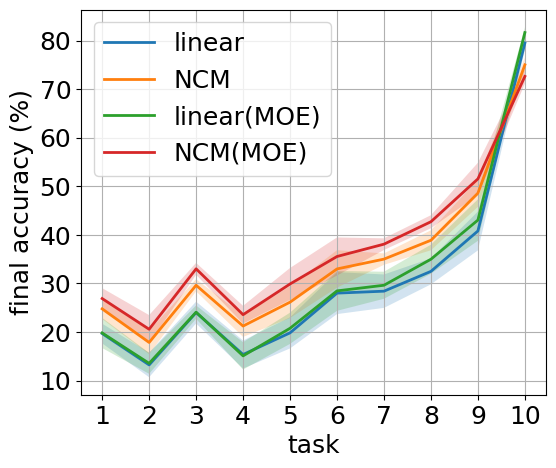

mem_size: 2000
linear_mean:	 [33.08000069 27.33999977 35.44000053 26.3        34.69999962 41.87999954
 41.7        42.6        53.61999969 72.98000031]
linear_std:	 [3.34568428 3.39917644 4.55482196 2.47305508 4.14535838 2.87221205
 3.05286765 0.85557022 2.29207383 0.8772678 ]
NCM_mean:	 [38.47999954 32.66000061 42.30000076 30.66000023 38.56000061 44.08000031
 45.60000076 47.08000031 54.84000015 69.73999939]
NCM_std:	 [2.5301385  3.0309079  1.62726818 1.30935131 2.16111018 0.986712
 1.26332904 0.82559052 2.01752282 1.67642496]
linear(MOE)_mean:	 [34.08000031 27.80000038 36.43999939 26.46000023 35.12000046 42.41999969
 43.3        44.6        56.24000015 74.94000092]
linear(MOE)_std:	 [2.82092218 3.62049729 5.16627495 2.93571108 3.85507498 3.00759043
 2.81780026 0.60662996 3.1897331  1.10018235]
NCM(MOE)_mean:	 [40.2        35.59999924 45.23999939 34.44000015 40.74000015 46.41999969
 47.87999954 49.50000076 56.91999969 67.58000031]
NCM(MOE)_std:	 [2.41080866 2.69518058 2.64847116 1.2175

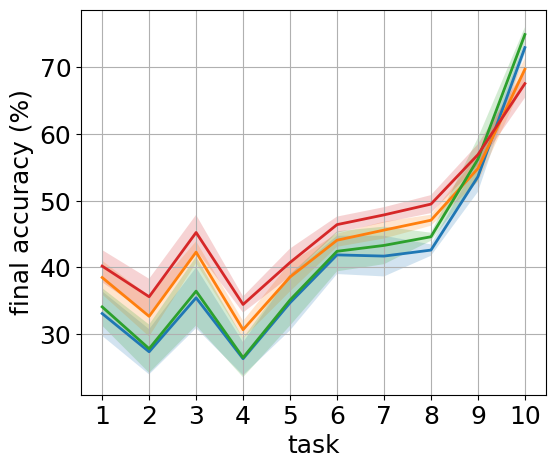

mem_size: 5000
linear_mean:	 [50.22000046 43.17999954 51.48000031 43.87999954 48.06000061 50.1
 52.04000015 52.22000046 59.17999954 64.35999985]
linear_std:	 [1.74287165 3.12819443 1.93225302 1.70340862 1.79064258 3.25269115
 2.36440321 1.57657862 3.09864507 5.99586649]
NCM_mean:	 [53.35999985 47.70000076 56.82000046 47.18000031 52.3        55.65999908
 54.62000046 55.62000046 60.95999985 62.11999893]
NCM_std:	 [1.62308386 1.99699826 1.59423912 0.54184856 0.71833159 1.17064064
 1.64608685 1.03033916 0.90244103 1.49050268]
linear(MOE)_mean:	 [51.07999954 44.82000046 53.97999954 44.61999969 51.39999924 53.35999985
 54.41999893 55.4        62.38000107 66.27999878]
linear(MOE)_std:	 [1.86268608 2.11886725 0.87498586 1.74745511 2.44049106 3.12960042
 2.49751862 1.80554764 2.28333104 4.3632095 ]
NCM(MOE)_mean:	 [55.03999939 49.23999939 57.86000061 48.13999939 53.6        56.85999985
 54.95999985 56.00000076 61.15999985 61.20000076]
NCM(MOE)_std:	 [1.37054674 2.25441788 0.97897871 1.0012001  

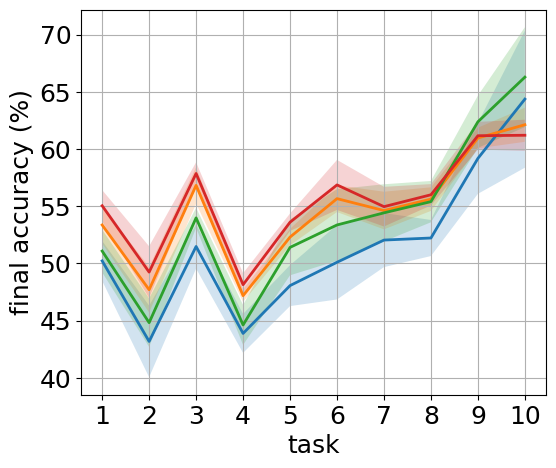

In [60]:
def plot_cls_final_acc(mem='1000', legend=False):
    expert0,expert1,expert2,expert3 = {}, {}, {}, {}
    for run_id in RUNS:
        expert0[run_id] = [0. for _ in range(10)]
        expert1[run_id] = [0. for _ in range(10)]
        expert2[run_id] = [0. for _ in range(10)]
        expert3[run_id] = [0. for _ in range(10)]

        expert0_df = last_cls_csv_files[CLASSIFER_PREFIXES[0]][mem][run_id]
        expert1_df = last_cls_csv_files[CLASSIFER_PREFIXES[1]][mem][run_id]
        expert2_df = moe_cls_csv_files[CLASSIFER_PREFIXES[0]][mem][run_id]
        expert3_df = moe_cls_csv_files[CLASSIFER_PREFIXES[1]][mem][run_id]

        current_task_id = 9
        for test_task_id in range(current_task_id+1):
            test_task_name  = f"task{test_task_id}"
            
            expert0[run_id][test_task_id] += expert0_df.iloc[current_task_id][test_task_name]
            expert1[run_id][test_task_id] += expert1_df.iloc[current_task_id][test_task_name]
            expert2[run_id][test_task_id] += expert2_df.iloc[current_task_id][test_task_name]
            expert3[run_id][test_task_id] += expert3_df.iloc[current_task_id][test_task_name]

    expert0_mean = np.mean([expert0[run] for run in RUNS], axis=0)
    expert0_std = np.std([expert0[run] for run in RUNS], axis=0)
    expert1_mean = np.mean([expert1[run] for run in RUNS], axis=0)
    expert1_std = np.std([expert1[run] for run in RUNS], axis=0)
    expert2_mean = np.mean([expert2[run] for run in RUNS], axis=0)
    expert2_std = np.std([expert2[run] for run in RUNS], axis=0)
    expert3_mean = np.mean([expert3[run] for run in RUNS], axis=0)
    expert3_std = np.std([expert3[run] for run in RUNS], axis=0)

    print(f"mem_size: {mem}")
    print(f"linear_mean:\t {expert0_mean}")
    print(f"linear_std:\t {expert0_std}")
    print(f"NCM_mean:\t {expert1_mean}")
    print(f"NCM_std:\t {expert1_std}")
    print(f"linear(MOE)_mean:\t {expert2_mean}")
    print(f"linear(MOE)_std:\t {expert2_std}")
    print(f"NCM(MOE)_mean:\t {expert3_mean}")
    print(f"NCM(MOE)_std:\t {expert3_std}")

    figure = plt.figure(figsize=(6,5))
    x = np.arange(1, 11)
    plt.plot(x, expert0_mean, linewidth=2.0, label='linear')
    plt.plot(x, expert1_mean, linewidth=2.0, label='NCM')
    plt.plot(x, expert2_mean, linewidth=2.0, label='linear(MOE)')
    plt.plot(x, expert3_mean, linewidth=2.0, label='NCM(MOE)')

    plt.fill_between(x, expert0_mean-expert0_std, expert0_mean+expert0_std, alpha=0.2)
    plt.fill_between(x, expert1_mean-expert1_std, expert1_mean+expert1_std, alpha=0.2)
    plt.fill_between(x, expert2_mean-expert2_std, expert2_mean+expert2_std, alpha=0.2)
    plt.fill_between(x, expert3_mean-expert3_std, expert3_mean+expert3_std, alpha=0.2)

    plt.xlabel('task', fontdict={'size' : 18})
    plt.ylabel('final accuracy (%)', fontdict={'size' : 18})
    plt.xticks(x, size= 18)
    plt.yticks(size= 18)
    plt.grid()
    if legend:
        plt.legend(loc='best', fontsize=18, fancybox=True)
    plt.show()

plot_cls_final_acc('1000', True)
plot_cls_final_acc('2000', False)
plot_cls_final_acc('5000', False)

## Exploring Multi-level Experts

In [61]:
last_obs_csv_files = {}
moe_obs_csv_files = {}
for e in range(4):
    prefix = f"mose | obs_expert{e} | ocm"
    last_obs_csv_files[e] = {}
    moe_obs_csv_files[e] = {}
    for mem in MEM_SIZE:
        last_obs_csv_files[e][mem] = {}
        moe_obs_csv_files[e][mem] = {}
        for run_id in RUNS:
            for folder in folders:
                if prefix in folder and mem in folder and run_id in folder:
                    csv_path = os.path.join(folder, 'last_task_accs_table.csv')
                    last_obs_csv_files[e][mem][run_id] = pd.read_csv(csv_path)
                    moe_csv_path = os.path.join(folder, 'task_accs_table.csv')
                    moe_obs_csv_files[e][mem][run_id] = pd.read_csv(moe_csv_path)

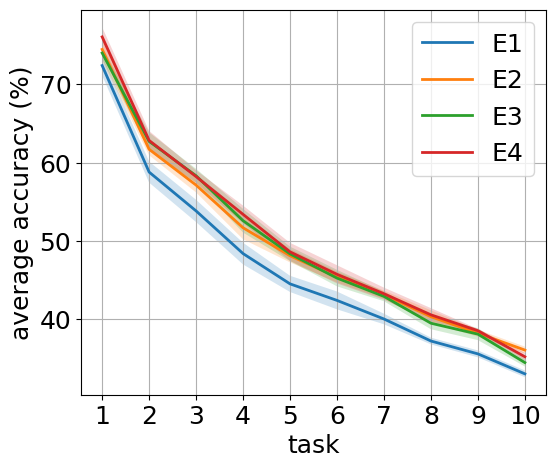

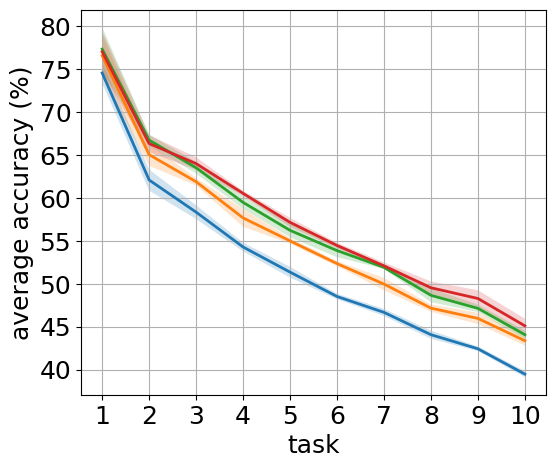

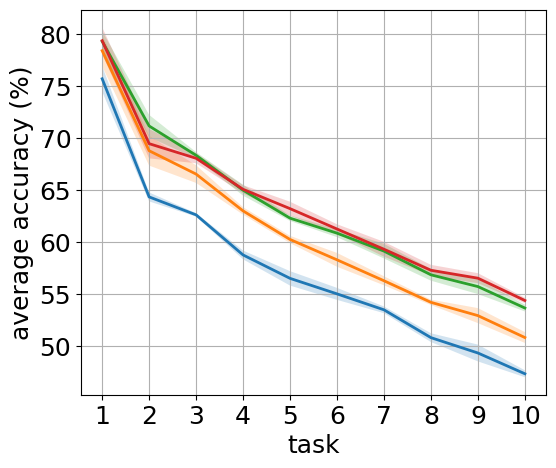

In [66]:
plot_expert_avg_acc('1000', last_obs_csv_files, True)
plot_expert_avg_acc('2000', last_obs_csv_files, False)
plot_expert_avg_acc('5000', last_obs_csv_files, False)

# plot_expert_avg_acc('1000', moe_obs_csv_files, True)
# plot_expert_avg_acc('2000', moe_obs_csv_files, False)
# plot_expert_avg_acc('5000', moe_obs_csv_files, False)

mem_size: 1000
expert0_mean:	 [28.01999969 22.78000031 30.62000008 22.81999969 26.83999977 33.19999962
 35.94000015 36.22000046 41.7        52.25999985]
expert0_std:	 [2.27367522 2.44981621 2.23015733 1.84000005 3.45172442 3.37342542
 0.88679129 2.23553117 2.0268197  1.59323562]
expert1_mean:	 [27.81999969 23.99999962 33.76000061 24.7        29.95999985 37.16000061
 38.75999985 39.11999969 46.22000046 59.26000061]
expert1_std:	 [2.50710986 2.34776472 1.2531561  1.23935466 2.89523747 2.83450171
 0.47581537 1.57404002 2.58410451 2.53029621]
expert2_mean:	 [23.83999977 18.68000011 29.90000038 19.38000031 26.53999977 33.4
 33.87999916 39.         48.73999939 71.41999969]
expert2_std:	 [3.47827569 2.2920732  1.36235093 1.04575305 1.09105466 4.55982397
 2.13016362 2.50679142 2.98502937 2.37436207]
expert3_mean:	 [25.34000015 18.50000038 30.32000008 21.12000008 26.47999954 31.94000015
 34.26000023 40.21999969 48.19999924 75.84000092]
expert3_std:	 [3.19912476 2.61610405 2.34213666 1.33026308 

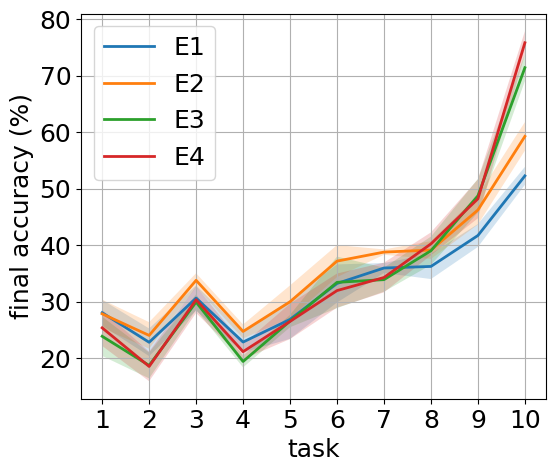

mem_size: 2000
expert0_mean:	 [36.5        32.         40.37999954 31.         36.44000015 39.95999908
 42.77999954 40.2        45.12000046 50.28000031]
expert0_std:	 [1.02956272 0.55497698 1.53674957 1.58113837 1.40085726 2.01950396
 2.64907489 1.8579563  1.4076925  2.54668433]
expert1_mean:	 [39.45999908 34.11999969 43.47999954 33.42000008 39.32000046 44.9
 45.46000061 45.33999939 50.85999908 57.25999985]
expert1_std:	 [1.8325941  2.25778572 2.68804778 1.76000014 1.75886335 1.40285447
 0.59866599 1.74424787 2.00059964 3.40446805]
expert2_mean:	 [37.34000092 31.63999977 42.48000031 31.94000015 38.21999969 44.7
 45.51999969 47.70000076 54.42000046 66.68000031]
expert2_std:	 [1.47186876 2.53503488 2.05854293 1.49746421 2.37267766 1.61616876
 1.29830723 1.6087266  1.35558199 1.00677735]
expert3_mean:	 [39.19999924 32.22000008 44.12000046 31.85999947 39.2        44.87999954
 45.85999985 48.54000015 55.64000092 69.46000061]
expert3_std:	 [2.45275339 2.1967247  2.50950206 1.63045959 1.41844

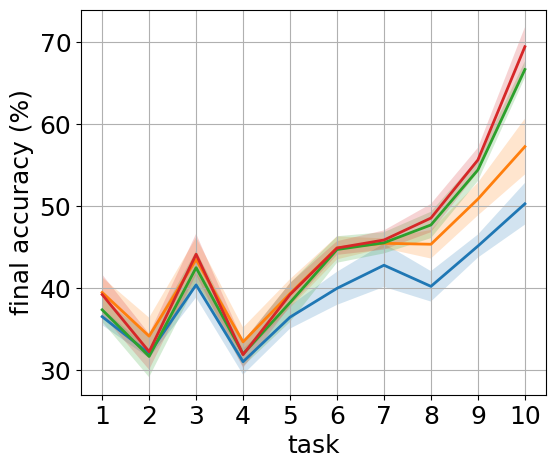

mem_size: 5000
expert0_mean:	 [46.78000031 42.5        50.60000076 42.1        46.4        49.9
 48.76000061 46.1        50.25999985 49.94000015]
expert0_std:	 [0.70823702 1.24096786 1.13666175 1.34610519 1.62849533 1.87936211
 1.17575572 0.71274177 1.07628966 1.3807239 ]
expert1_mean:	 [49.95999985 45.48000031 54.08000031 45.6        49.12000046 52.6
 52.08000031 50.3        54.55999985 54.4       ]
expert1_std:	 [1.26585958 1.39628116 1.14960824 1.19666187 1.51049702 1.32966129
 2.14606629 1.22800604 1.12712011 0.88769428]
expert2_mean:	 [51.26000061 46.84000015 55.94000015 45.97999954 51.5        54.9
 54.82000122 54.15999985 59.95999908 61.19999924]
expert2_std:	 [1.65963831 1.03072788 0.98508893 1.50784595 0.37416533 1.17643531
 1.62160407 1.64389798 0.63118954 1.74470668]
expert3_mean:	 [51.86000061 48.1        56.62000046 47.8        51.94000015 55.71999969
 54.71999969 55.08000031 60.77999954 61.2       ]
expert3_std:	 [0.93936252 1.97180169 0.87498591 1.30383978 1.34699731 1.5

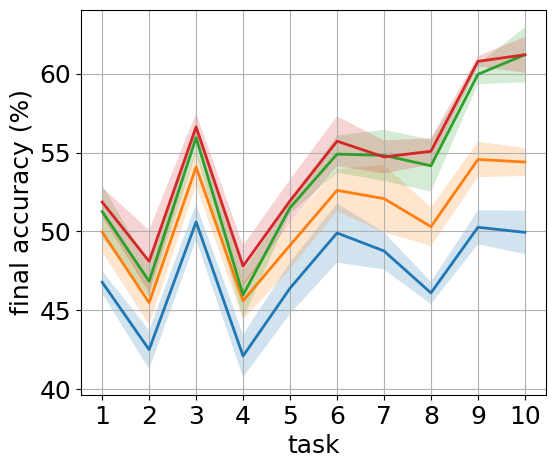

In [65]:
plot_expert_final_acc('1000', last_obs_csv_files, True)
plot_expert_final_acc('2000', last_obs_csv_files, False)
plot_expert_final_acc('5000', last_obs_csv_files, False)

# plot_expert_final_acc('1000', moe_obs_csv_files, True)
# plot_expert_final_acc('2000', moe_obs_csv_files, False)
# plot_expert_final_acc('5000', moe_obs_csv_files, False)

In [73]:
last_buf_csv_files = {}
moe_buf_csv_files = {}
for e in range(4):
    prefix = f"mose | expert{e} | ocm"
    last_buf_csv_files[e] = {}
    moe_buf_csv_files[e] = {}
    for mem in MEM_SIZE:
        last_buf_csv_files[e][mem] = {}
        moe_buf_csv_files[e][mem] = {}
        for run_id in RUNS:
            for folder in folders:
                if prefix in folder and mem in folder and run_id in folder:
                    csv_path = os.path.join(folder, 'buffer_last_task_accs_table.csv')
                    last_buf_csv_files[e][mem][run_id] = pd.read_csv(csv_path)
                    moe_csv_path = os.path.join(folder, 'buffer_task_accs_table.csv')
                    moe_buf_csv_files[e][mem][run_id] = pd.read_csv(moe_csv_path)

last_obs_buf_csv_files = {}
moe_obs_buf_csv_files = {}
for e in range(4):
    prefix = f"mose | obs_expert{e} | ocm"
    last_obs_buf_csv_files[e] = {}
    moe_obs_buf_csv_files[e] = {}
    for mem in MEM_SIZE:
        last_obs_buf_csv_files[e][mem] = {}
        moe_obs_buf_csv_files[e][mem] = {}
        for run_id in RUNS:
            for folder in folders:
                if prefix in folder and mem in folder and run_id in folder:
                    csv_path = os.path.join(folder, 'buffer_last_task_accs_table.csv')
                    last_obs_buf_csv_files[e][mem][run_id] = pd.read_csv(csv_path)
                    moe_csv_path = os.path.join(folder, 'buffer_task_accs_table.csv')
                    moe_obs_buf_csv_files[e][mem][run_id] = pd.read_csv(moe_csv_path)

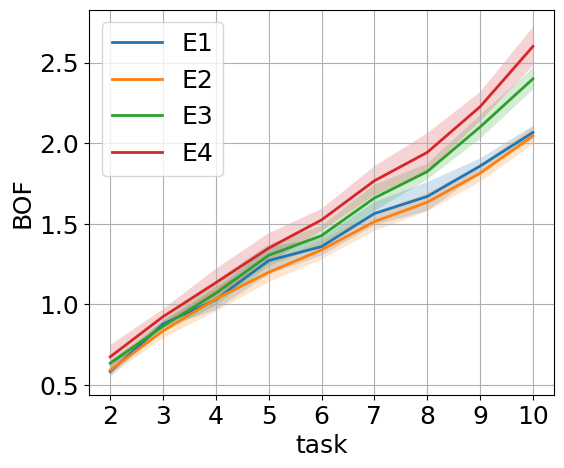

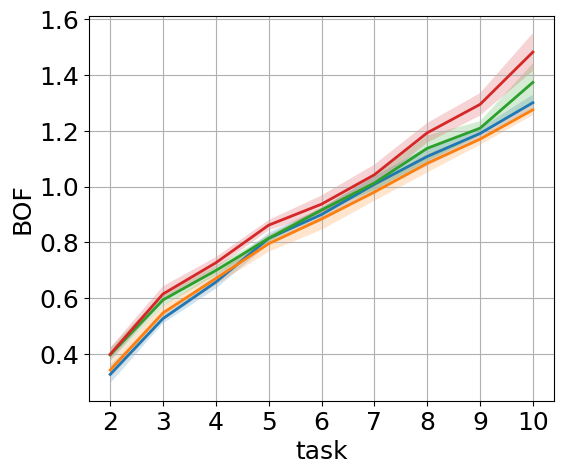

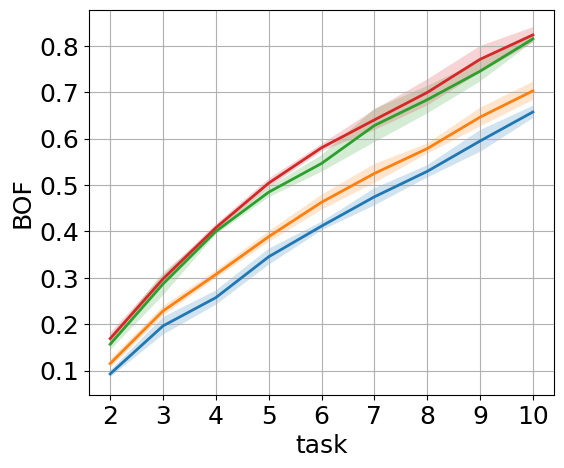

In [81]:
def plot_expert_bof(mem='1000', csv_files=last_csv_files, buf_csv_files=last_buf_csv_files, legend=False):
    expert0,expert1,expert2,expert3 = {}, {}, {}, {}
    for run_id in RUNS:
        expert0[run_id] = [0. for _ in range(10)]
        expert1[run_id] = [0. for _ in range(10)]
        expert2[run_id] = [0. for _ in range(10)]
        expert3[run_id] = [0. for _ in range(10)]

        expert0_df = csv_files[0][mem][run_id]
        expert1_df = csv_files[1][mem][run_id]
        expert2_df = csv_files[2][mem][run_id]
        expert3_df = csv_files[3][mem][run_id]

        expert0_buf_df = buf_csv_files[0][mem][run_id]
        expert1_buf_df = buf_csv_files[1][mem][run_id]
        expert2_buf_df = buf_csv_files[2][mem][run_id]
        expert3_buf_df = buf_csv_files[3][mem][run_id]

        for current_task_id in range(1, 10):
            for test_task_id in range(current_task_id):
                test_task_name  = f"task{test_task_id}"
                
                expert0[run_id][current_task_id] += (expert0_buf_df.iloc[current_task_id][test_task_name] - expert0_df.iloc[current_task_id][test_task_name]) / ((current_task_id) * expert0_df.iloc[current_task_id][test_task_name])
                expert1[run_id][current_task_id] += (expert1_buf_df.iloc[current_task_id][test_task_name] - expert1_df.iloc[current_task_id][test_task_name]) / ((current_task_id) * expert1_df.iloc[current_task_id][test_task_name])
                expert2[run_id][current_task_id] += (expert2_buf_df.iloc[current_task_id][test_task_name] - expert2_df.iloc[current_task_id][test_task_name]) / ((current_task_id) * expert2_df.iloc[current_task_id][test_task_name])
                expert3[run_id][current_task_id] += (expert3_buf_df.iloc[current_task_id][test_task_name] - expert3_df.iloc[current_task_id][test_task_name]) / ((current_task_id) * expert3_df.iloc[current_task_id][test_task_name])

    expert0_mean = np.mean([expert0[run] for run in RUNS], axis=0)[1:]
    expert0_std = np.std([expert0[run] for run in RUNS], axis=0)[1:]
    expert1_mean = np.mean([expert1[run] for run in RUNS], axis=0)[1:]
    expert1_std = np.std([expert1[run] for run in RUNS], axis=0)[1:]
    expert2_mean = np.mean([expert2[run] for run in RUNS], axis=0)[1:]
    expert2_std = np.std([expert2[run] for run in RUNS], axis=0)[1:]
    expert3_mean = np.mean([expert3[run] for run in RUNS], axis=0)[1:]
    expert3_std = np.std([expert3[run] for run in RUNS], axis=0)[1:]

    figure = plt.figure(figsize=(6,5))
    x = np.arange(2, 11)
    plt.plot(x, expert0_mean, linewidth=2.0, label='E1')
    plt.plot(x, expert1_mean, linewidth=2.0, label='E2')
    plt.plot(x, expert2_mean, linewidth=2.0, label='E3')
    plt.plot(x, expert3_mean, linewidth=2.0, label='E4')

    plt.fill_between(x, expert0_mean-expert0_std, expert0_mean+expert0_std, alpha=0.2)
    plt.fill_between(x, expert1_mean-expert1_std, expert1_mean+expert1_std, alpha=0.2)
    plt.fill_between(x, expert2_mean-expert2_std, expert2_mean+expert2_std, alpha=0.2)
    plt.fill_between(x, expert3_mean-expert3_std, expert3_mean+expert3_std, alpha=0.2)

    plt.xlabel('task', fontdict={'size' : 18})
    plt.ylabel('BOF', fontdict={'size' : 18})
    plt.xticks(x, size= 18)
    plt.yticks(size= 18)
    plt.grid()
    if legend:
        plt.legend(loc='best', fontsize=18, fancybox=True)
    plt.show()

plot_expert_bof('1000', last_csv_files, last_buf_csv_files, True)
plot_expert_bof('2000', last_csv_files, last_buf_csv_files, False)
plot_expert_bof('5000', last_csv_files, last_buf_csv_files, False)

# plot_expert_bof('1000', moe_csv_files, moe_buf_csv_files, True)
# plot_expert_bof('2000', moe_csv_files, moe_buf_csv_files, False)
# plot_expert_bof('5000', moe_csv_files, moe_buf_csv_files, False)

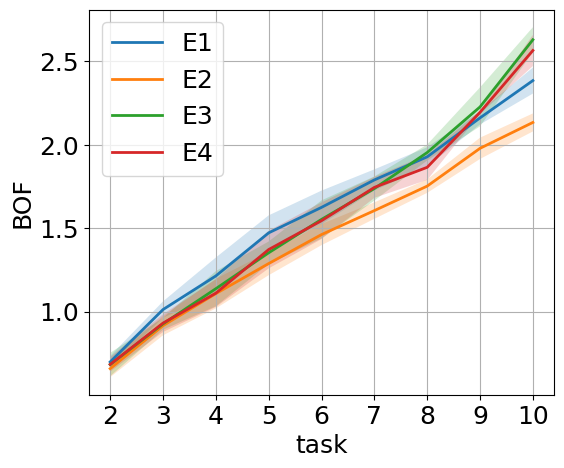

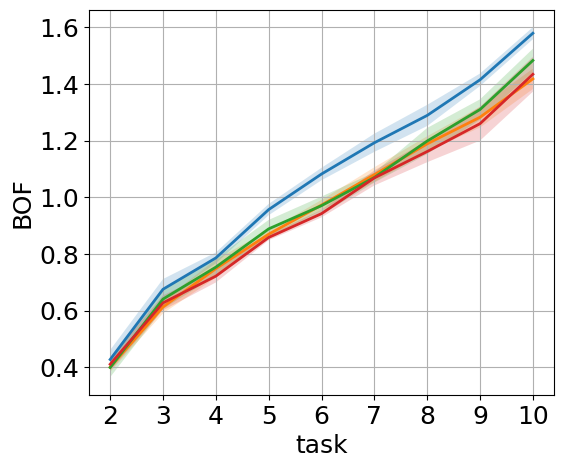

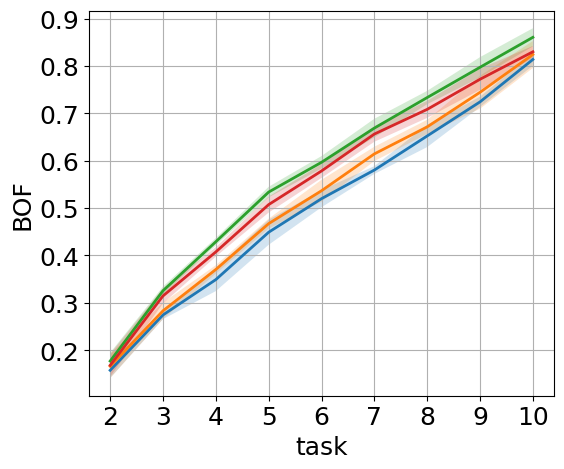

In [82]:
plot_expert_bof('1000', last_obs_csv_files, last_obs_buf_csv_files, True)
plot_expert_bof('2000', last_obs_csv_files, last_obs_buf_csv_files, False)
plot_expert_bof('5000', last_obs_csv_files, last_obs_buf_csv_files, False)

# plot_expert_bof('1000', moe_obs_csv_files, moe_obs_buf_csv_files, True)
# plot_expert_bof('2000', moe_obs_csv_files, moe_obs_buf_csv_files, False)
# plot_expert_bof('5000', moe_obs_csv_files, moe_obs_buf_csv_files, False)

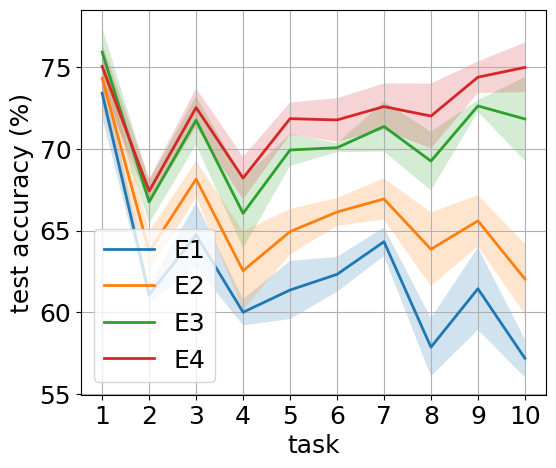

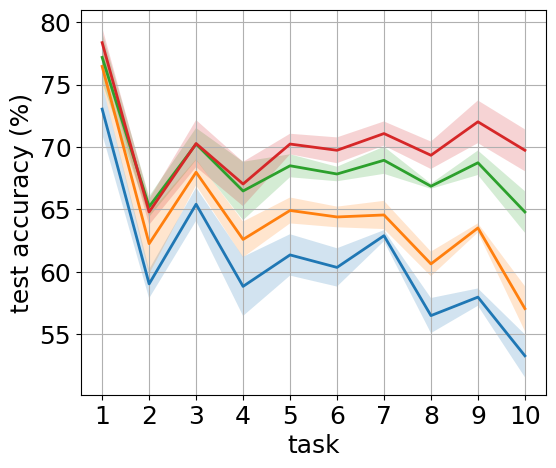

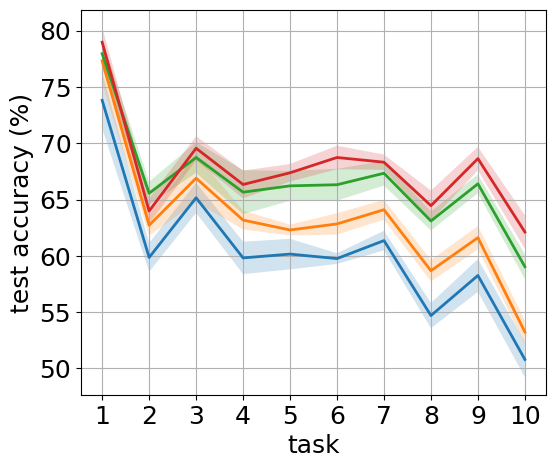

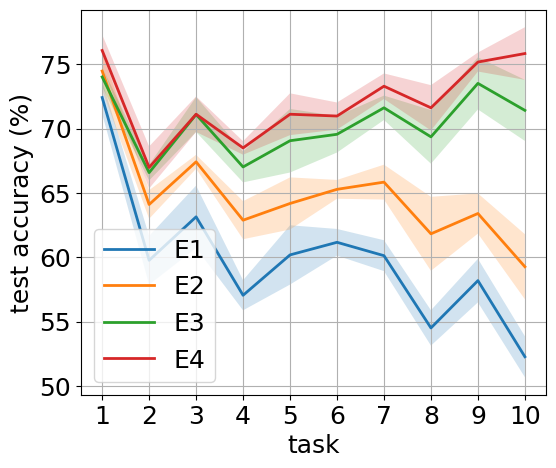

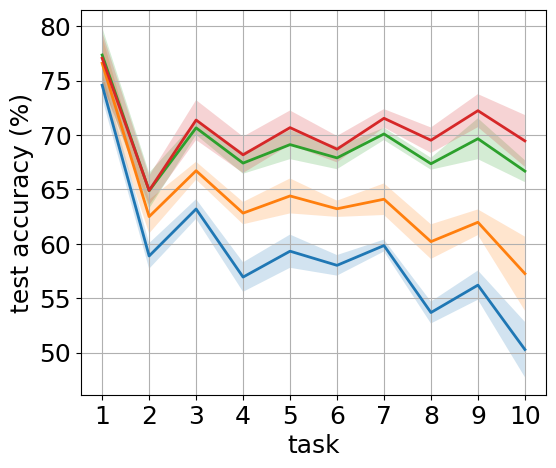

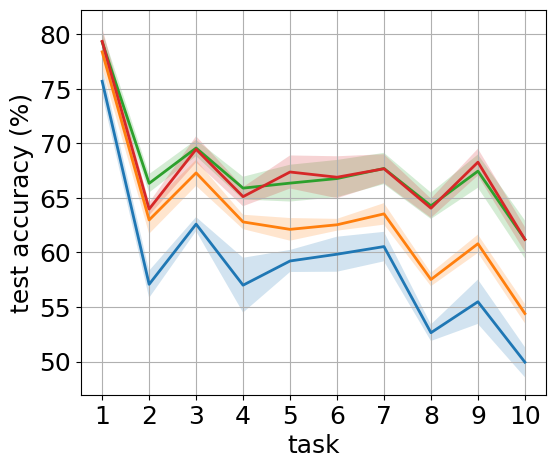

In [80]:
def plot_expert_new_acc(mem='1000', csv_files=last_csv_files,  legend=False):
    expert0,expert1,expert2,expert3 = {}, {}, {}, {}
    for run_id in RUNS:
        expert0[run_id] = [0. for _ in range(10)]
        expert1[run_id] = [0. for _ in range(10)]
        expert2[run_id] = [0. for _ in range(10)]
        expert3[run_id] = [0. for _ in range(10)]

        expert0_df = csv_files[0][mem][run_id]
        expert1_df = csv_files[1][mem][run_id]
        expert2_df = csv_files[2][mem][run_id]
        expert3_df = csv_files[3][mem][run_id]

        for current_task_id in range(10):
            test_task_id = current_task_id
            test_task_name  = f"task{test_task_id}"
                
            expert0[run_id][current_task_id] += expert0_df.iloc[current_task_id][test_task_name]
            expert1[run_id][current_task_id] += expert1_df.iloc[current_task_id][test_task_name]
            expert2[run_id][current_task_id] += expert2_df.iloc[current_task_id][test_task_name]
            expert3[run_id][current_task_id] += expert3_df.iloc[current_task_id][test_task_name]

    expert0_mean = np.mean([expert0[run] for run in RUNS], axis=0)
    expert0_std = np.std([expert0[run] for run in RUNS], axis=0)
    expert1_mean = np.mean([expert1[run] for run in RUNS], axis=0)
    expert1_std = np.std([expert1[run] for run in RUNS], axis=0)
    expert2_mean = np.mean([expert2[run] for run in RUNS], axis=0)
    expert2_std = np.std([expert2[run] for run in RUNS], axis=0)
    expert3_mean = np.mean([expert3[run] for run in RUNS], axis=0)
    expert3_std = np.std([expert3[run] for run in RUNS], axis=0)

    figure = plt.figure(figsize=(6,5))
    x = np.arange(1, 11)
    plt.plot(x, expert0_mean, linewidth=2.0, label='E1')
    plt.plot(x, expert1_mean, linewidth=2.0, label='E2')
    plt.plot(x, expert2_mean, linewidth=2.0, label='E3')
    plt.plot(x, expert3_mean, linewidth=2.0, label='E4')

    plt.fill_between(x, expert0_mean-expert0_std, expert0_mean+expert0_std, alpha=0.2)
    plt.fill_between(x, expert1_mean-expert1_std, expert1_mean+expert1_std, alpha=0.2)
    plt.fill_between(x, expert2_mean-expert2_std, expert2_mean+expert2_std, alpha=0.2)
    plt.fill_between(x, expert3_mean-expert3_std, expert3_mean+expert3_std, alpha=0.2)

    plt.xlabel('task', fontdict={'size' : 18})
    plt.ylabel('test accuracy (%)', fontdict={'size' : 18})
    plt.xticks(x, size= 18)
    plt.yticks(size= 18)
    plt.grid()
    if legend:
        plt.legend(loc='best', fontsize=18, fancybox=True)
    plt.show()

plot_expert_new_acc('1000', last_csv_files, True)
plot_expert_new_acc('2000', last_csv_files, False)
plot_expert_new_acc('5000', last_csv_files, False)

plot_expert_new_acc('1000', last_obs_csv_files, True)
plot_expert_new_acc('2000', last_obs_csv_files, False)
plot_expert_new_acc('5000', last_obs_csv_files, False)

# plot_expert_new_acc('1000', moe_csv_files, True)
# plot_expert_new_acc('2000', moe_csv_files, False)
# plot_expert_new_acc('5000', moe_csv_files, False)

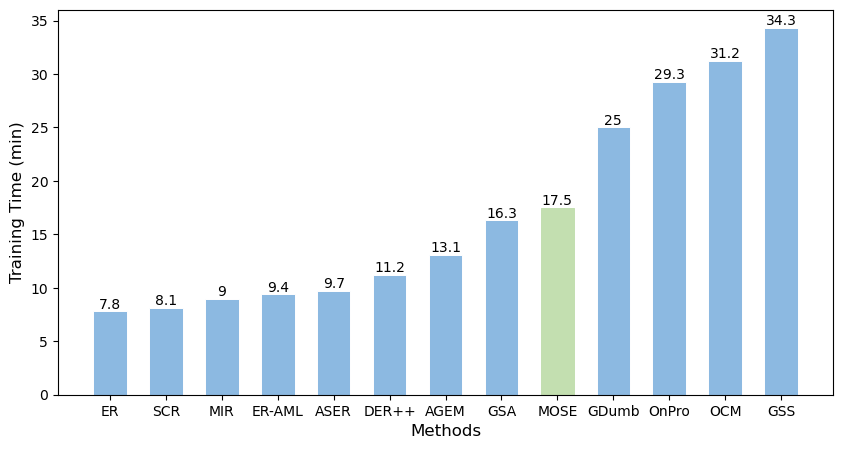

In [120]:
Trainin_time_dict = {
'ER': 	7.8,
'SCR': 	8.1,
'MIR': 	9.0,
'ER-AML': 	9.4,
'ASER': 	9.7,
'DER++': 	11.2,
'AGEM': 	13.1,
'GSA': 	    16.3,
'MOSE': 	17.5,
'GDumb': 	25.0,
'OnPro': 	29.3,
'OCM': 	31.2,
'GSS': 	34.3,
}

figure = plt.figure(figsize=(10,5))

patch = plt.bar(Trainin_time_dict.keys(), Trainin_time_dict.values(), width=0.6, edgecolor="white", linewidth=0.7, color='#8cb9e1', label=Trainin_time_dict.values())

plt.xlabel('Methods', fontdict={'size' : 12})
plt.ylabel('Training Time (min)', fontdict={'size' : 12})
plt.xticks( size= 10)
plt.yticks(size= 10)

plt.bar_label(patch, )
patch[8].set(color= '#c3dfb0')
# plt.grid()
# if legend:
# plt.legend(loc='best', fontsize=18, fancybox=True)
plt.show()
